In [45]:
import pandas as pd
import matplotlib as plt
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
pd.read_csv('projectdata/immigration.csv') #imports the data set

,Country,Population,Immigrant_Population,Emigrants_Population,Population Change,Ration of Population Change to Total Population,Ratio of Emigrants to Population,Ratio of Immigrants to Population
0,Montserrat,4389,1379,24582,-23203,-528.66%,560.08%,5.61%
1,Niue,1819,588,5186,-4598,-252.78%,285.10%,11.34%
2,Cook Islands,13729,4579,21106,-16527,-120.38%,153.73%,21.70%
3,Dominica,66205,8284,78191,-69907,-105.59%,118.10%,10.59%
4,Saint Kitts and Nevis,46843,7725,50285,-42560,-90.86%,107.35%,15.36%
...,...,...,...,...,...,...,...,...
220,Sint Maarten,43350,28845,2191,26654,61.49%,5.05%,1316.52%
221,United States Virgin Islands,84905,56753,3908,52845,62.24%,4.60%,1452.23%
222,Qatar,3048423,2226192,25705,2200487,72.18%,0.84%,8660.54%
223,United Arab Emirates,11027129,8716332,203214,8513118,77.20%,1.84%,4289.24%


In [5]:
df = pd.read_csv('projectdata/immigration.csv') #renamed the data set to df

In [6]:
df.columns

Index(['Country', 'Population', 'Immigrant_Population', 'Emigrants_Population',
       'Population Change', 'Ration of Population Change to Total Population',
       'Ratio of Emigrants to Population',
       'Ratio of Immigrants to Population'],
      dtype='object')

In [7]:
top_immigrant_country = df.sort_values('Immigrant_Population', ascending=False).head(1) #U.S.
top_emigrant_country = df.sort_values('Emigrants_Population', ascending=False).head(1)#India

In [8]:
#filter countries with a population of less than 1 million
small_df = df[ df.Population < 1000000 ]

In [9]:
#filter countries with a population of more than 100 million
large_df = df[ df.Population > 100000000 ]

In [41]:
#average immigrant and emigrant populations for small countries
average_immigrant_small = small_df['Immigrant_Population'].mean()
average_emigrant_small = small_df['Emigrants_Population'].mean()

print(f'The average Immigrant population for countries with a population < 1 Million is {average_immigrant_small}')
print(f'The average Emigrant population for countries with a population < 1 Million is {average_emigrant_small}')

The average Immigrant population for countries with a population < 1 Million is 39916.79104477612
The average Emigrant population for countries with a population < 1 Million is 46946.119402985074


In [19]:
average_immigrant_large = large_df['Immigrant_Population'].mean()
average_emigrant_large = large_df['Emigrants_Population'].mean()

print(f'The average Immigrant population for countries with a population > 100 Million is {average_immigrant_large}')
print(f'The average Emigrant population for countries with a population > 100 Million is {average_emigrant_large}')

The average Immigrant population for countries with a population > 100 Million is 5198570.75
The average Emigrant population for countries with a population > 100 Million is 5740765.625


In [21]:
# Rank small countries by immigrant population
top_immigrant_small_countries = small_df.sort_values('Immigrant_Population', ascending=False).head(5)

top_immigrant_small_countries

,Country,Population,Immigrant_Population,Emigrants_Population,Population Change,Ration of Population Change to Total Population,Ratio of Emigrants to Population,Ratio of Immigrants to Population
204,Macau,720262,403490,145192,258298,35.86%,20.16%,277.90%
203,Luxembourg,673036,298062,81757,216305,32.14%,12.15%,364.57%
187,Reunion Island,878591,131769,3064,128705,14.65%,0.35%,4300.55%
207,French Guiana,308522,119249,4595,114654,37.16%,1.49%,2595.19%
148,Malta,539607,114760,102793,11967,2.22%,19.05%,111.64%


In [23]:
small_continent_dict = {
    'Macau': 'Asia',
    'Luxembourg': 'Europe',
    'Reunion Island': 'Africa',
    'French Guiana': 'South America',
    'Malta': 'Europe',
}

top_immigrant_small_countries['Continent'] = top_immigrant_small_countries['Country'].map(small_continent_dict)
top_immigrant_small_countries

,Country,Population,Immigrant_Population,Emigrants_Population,Population Change,Ration of Population Change to Total Population,Ratio of Emigrants to Population,Ratio of Immigrants to Population,Continent
204,Macau,720262,403490,145192,258298,35.86%,20.16%,277.90%,Asia
203,Luxembourg,673036,298062,81757,216305,32.14%,12.15%,364.57%,Europe
187,Reunion Island,878591,131769,3064,128705,14.65%,0.35%,4300.55%,Africa
207,French Guiana,308522,119249,4595,114654,37.16%,1.49%,2595.19%,South America
148,Malta,539607,114760,102793,11967,2.22%,19.05%,111.64%,Europe


In [25]:
# Rank small countries by emigrant population
top_emigrant_small_countries = small_df.sort_values('Emigrants_Population', ascending=False).head(5)
top_emigrant_small_countries

,Country,Population,Immigrant_Population,Emigrants_Population,Population Change,Ration of Population Change to Total Population,Ratio of Emigrants to Population,Ratio of Immigrants to Population
11,Guyana,831087,31169,438413,-407244,-49.00%,52.75%,7.11%
16,Suriname,634431,47801,273209,-225408,-35.53%,43.06%,17.50%
26,Fiji,928784,14087,233856,-219769,-23.66%,25.18%,6.02%
21,Western Sahara,590506,5424,194932,-189508,-32.09%,33.01%,2.78%
20,Cape Verde,524877,15788,187558,-171770,-32.73%,35.73%,8.42%


In [27]:
# Rank large countries by immigrant population
top_immigrant_large_countries = large_df.sort_values('Immigrant_Population', ascending=False).head(5)

top_immigrant_large_countries

,Country,Population,Immigrant_Population,Emigrants_Population,Population Change,Ration of Population Change to Total Population,Ratio of Emigrants to Population,Ratio of Immigrants to Population
184,United States,345426571,50632836,2996223,47636613,13.79%,0.87%,1689.89%
137,Russia,144820423,11636911,10756697,880214,0.61%,7.43%,108.18%
115,India,1450935791,4878704,17869492,-12990788,-0.90%,1.23%,27.30%
112,Pakistan,251269164,3276580,6328400,-3051820,-1.21%,2.52%,51.78%
142,Japan,123753041,2770996,808825,1962171,1.59%,0.65%,342.60%


In [29]:
large_continent_dict = {
    'United States': 'North America',
    'Japan': 'Asia',
    'Russia': 'Europe',
    'India': 'Asia',
    'Pakistan': 'Asia',
}

top_immigrant_large_countries['Continent'] = top_immigrant_large_countries['Country'].map(large_continent_dict)
top_immigrant_large_countries

,Country,Population,Immigrant_Population,Emigrants_Population,Population Change,Ration of Population Change to Total Population,Ratio of Emigrants to Population,Ratio of Immigrants to Population,Continent
184,United States,345426571,50632836,2996223,47636613,13.79%,0.87%,1689.89%,North America
137,Russia,144820423,11636911,10756697,880214,0.61%,7.43%,108.18%,Europe
115,India,1450935791,4878704,17869492,-12990788,-0.90%,1.23%,27.30%,Asia
112,Pakistan,251269164,3276580,6328400,-3051820,-1.21%,2.52%,51.78%,Asia
142,Japan,123753041,2770996,808825,1962171,1.59%,0.65%,342.60%,Asia


In [31]:
# Rank large countries by emigrant population
top_emigrant_large_countries = large_df.sort_values('Emigrants_Population', ascending=False).head(5)

top_emigrant_large_countries

,Country,Population,Immigrant_Population,Emigrants_Population,Population Change,Ration of Population Change to Total Population,Ratio of Emigrants to Population,Ratio of Immigrants to Population
115,India,1450935791,4878704,17869492,-12990788,-0.90%,1.23%,27.30%
65,Mexico,130861007,1197624,11185737,-9988113,-7.63%,8.55%,10.71%
137,Russia,144820423,11636911,10756697,880214,0.61%,7.43%,108.18%
119,China,1419321278,1039675,10461170,-9421495,-0.66%,0.74%,9.94%
85,Bangladesh,173562364,2115408,7401763,-5286355,-3.05%,4.26%,28.58%


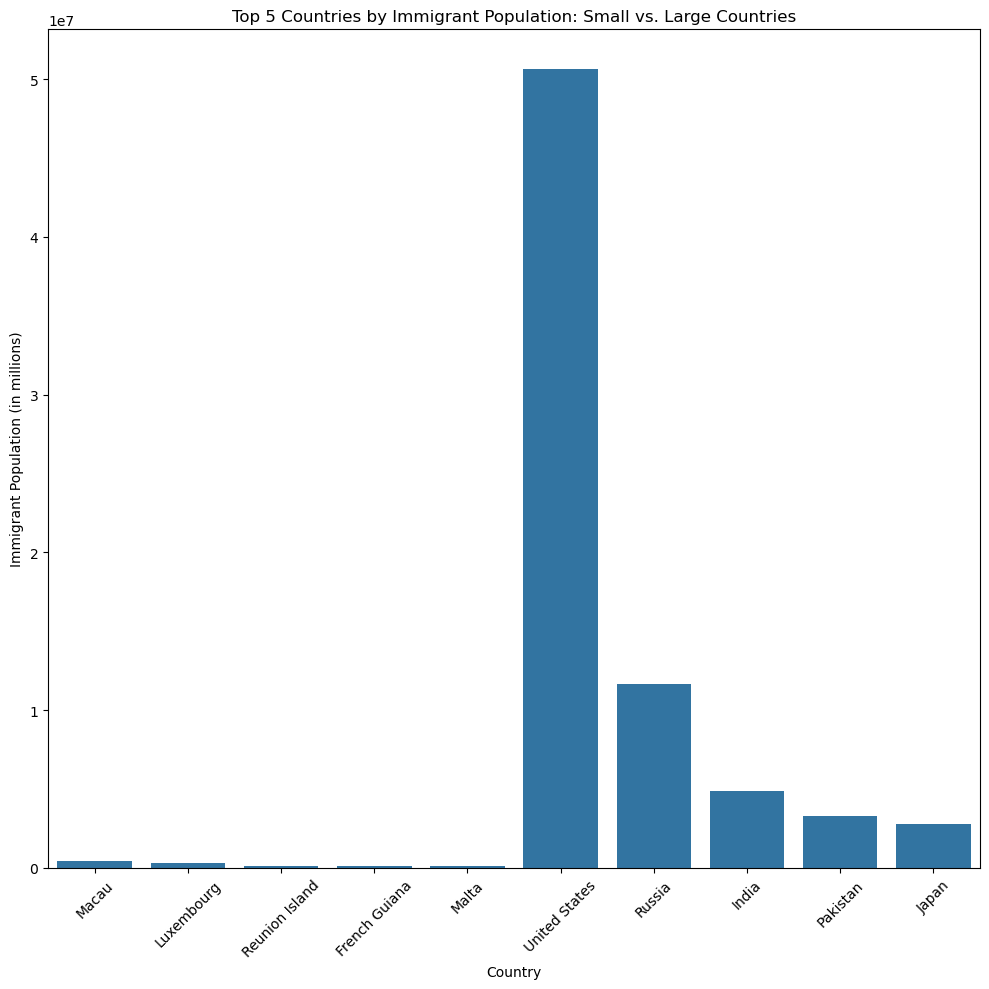

In [33]:
top_countries_combined = pd.concat([top_immigrant_small_countries, top_immigrant_large_countries])

plt.figure(figsize=(10, 10))
sns.barplot(x='Country', y='Immigrant_Population', data=top_countries_combined)

plt.title('Top 5 Countries by Immigrant Population: Small vs. Large Countries')
plt.ylabel('Immigrant Population (in millions)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
reg_pick = df[df['Country'].isin(['Trinidad and Tobago', 'Jamaica', 'Barbados', 'Grenada', 'Guyana', 'Martinique', 'Aruba', 'Cayman Islands', 'Haiti', 'Saint Lucia'])]

X = reg_pick[['Population', 'Immigrant_Population', 'Emigrants_Population']]
y = reg_pick['Population Change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 4.4952303208581736e-20
R-squared: 1.0
